STUDENT - Boniface Mutwiri Kimutai.

STUDENT STUDY - HYBRID

TECHNICAL MENTOR - MARYANN MWIKALI

# PROJECT OVERVIEW.

Business growth and development remains a central motivator in organizational decision-making and policy making. Although every business leader aspires to achieve growth in revenues, clientele, and profitability, they must try as much as possible to avoid making losses.

In recent years, such leaders, as well as business experts, have identified customer satisfaction as an important factor to ensuring such growth and development. Without customers, a business would not make any sales, record any cash inflows in terms of revenues, nor make any profits. This underscores the the need for organizations to implement measures that retain existing customers.

Recent technological advancements have also contributed to an increased business rivalry, especially due to increased startups and entrants. Such competition, coupled with an augmented saturation of markets, means that it has become harder and more expensive for businesses in most sectors to acquire new clients, which means they must shift their focus to cementing relationships with existing customers.

Through this project, I am  building a prediction model that identifies patterns in customer churning, which can be helpful in developing mitigation strategies. The project is structured as follows:

Business Understanding,
Data Understanding,
Data Preparation,
Exploratory Data Analysis,
Modelling,
Model Evaluation,
Recommendations and Conclusions.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.compose import ColumnTransformer       
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline             
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import roc_curve, roc_auc_score  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



### Libraries and Functions Overview

1. **Pandas (`pd`)**: Used for data manipulation and analysis, especially handling dataframes.
2. **NumPy (`np`)**: Provides support for numerical operations on arrays and matrices.
3. **Matplotlib (`plt`)**: Used for creating static visualizations like charts and graphs.
4. **%matplotlib inline**: Displays plots directly within Jupyter notebooks.
5. **Seaborn (`sns`)**: Builds on Matplotlib to create more advanced and aesthetically pleasing visualizations.
6. **Statsmodels (`sm`)**: Used for statistical modeling, hypothesis testing, and data exploration.
7. **train_test_split**: Splits data into training and testing sets for machine learning.
8. **OneHotEncoder**: Converts categorical variables into a format suitable for machine learning (binary columns).
9. **MinMaxScaler**: Scales features to a specified range (typically [0, 1]) to ensure uniformity.
10. **LogisticRegression**: A model used for binary classification tasks.
11. **Model Evaluation (`confusion_matrix`, `classification_report`, `accuracy_score`)**: Functions to assess the performance of classification models by calculating accuracy, precision, recall, and other metrics.

These tools are commonly used for data analysis, preprocessing, model training, and evaluation in machine learning workflows.


In [3]:
import pandas as pd

# Load the dataset to examine its structure
file_path = 'Customer Churn.csv'
df = pd.read_csv(file_path)

# Display the first few rows and basic info about the dataset
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Checking the general information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# checking to 10 rows
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [6]:
# Previewing the top 10 rows
df.tail(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3323,IN,117,415,362-5899,no,no,0,118.4,126,20.13,...,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,...,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,368-8555,no,no,0,193.4,99,32.88,...,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


# DATA UNDERSTANDING.
 The Churn in Telecom’s dataset from Kaggle contains information about customer activity and whether or not they canceled their subscription with Orange Telecom. The goal of this dataset is to develop predictive models that can help the telecom business reduce the amount of money lost due to customers who don’t stick around for very long.

The dataset contains 3333 entries and 21 columns, including information about the state, account length, area code, phone number, international plan, voice mail plan, number of voice mail messages, total day minutes, total day calls, total day charge, total evening minutes, total evening calls, total evening charge, total night minutes, total night calls, total night charge, total international minutes, total international calls, total international charge, customer service calls and churn.

From above general information, most of the columns have 2 or more words as the columns names. I need to remove the whitespaces so as to make the column names easily addressible. We need to rename the column names by removing white spaces and replacing with underscore '_'

In [7]:
# Removing whitespaces in the column name and replacing with '_'
df.columns = df.columns.str.replace(' ', '_')

In [8]:
# previewing the bottom 10 rows to confirm the columns names have been formated
df.head(10)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [9]:
# checking for the general shape of the df
df.shape

(3333, 21)

As previously confirmed, the df has 33333 rows and 21 columns

In [10]:
#Viewing the statistical details such as std, percentile, count, and the mean
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In this step we check for anormalies in the df. I need to dive deep into the data to see if we have missing values in terms of placeholder values or unique values.

# DATA CLEANING.


 Checking for general information about missing values across all the columns

In [11]:
#confirming that there no missing values (nan) in the dataframe
missing_values = df.isnull().sum()
print(missing_values)

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


There are no null values across all the columns. As I Observed, all columns indicate that we have zero null values. However, that does not mean that data has no missing records. As such, its important to review df further to identify values that are not a representation of the data

In that case, I take a look at each column for any anormalies such as wrong data type and unexpected records.

Lets start by checking the *state column*

In [12]:
# checking for value_count for the different state abbreviations
df.state.value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
NV     66
CO     66
WA     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

Because the state column is a representation of an area code, there is no need to check for duplicates as several subsribers can be residing in the same state.

However, because I have both state and area code, I will drop state and use area code to reference geographical location. The reason for us dropping the state column is because I have the area code column, which contains information on where each client resides.

In [13]:
# dropping the state column
df = df.drop('state', axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   phone_number            3333 non-null   object 
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

Looking at the our column information, I Observed that the state column has been successfuly dropped, leaving us with the area code column.

I will then proceed to check the *Account length Column*

In [15]:
# checking account length column
df.account_length.value_counts()

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account_length, Length: 212, dtype: int64

Given account_length isn't unique, and no null and missing values. There is no need for further checks on this column

Afterward, I also review the *Area Code Column* for the possibilities of unique or missing values

In [16]:
df.area_code.unique()

array([415, 408, 510], dtype=int64)

In [17]:
df.area_code.value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

Same as the account_length column, the column has no missing values and any other unexpected unique item. No further cleaning for this column

I will proceed to review the Phone Number Column

In [18]:
df.phone_number

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone_number, Length: 3333, dtype: object

In [19]:
df.phone_number.unique

<bound method Series.unique of 0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone_number, Length: 3333, dtype: object>

Given that Phone number is the unique Identifier, lets clean it and check for any duplicates. I do not expect the same phone number to be used by two different subscribers.

As was previously observed, phone_number column is of object datatype. Given these are digits we need to change them to an integer data type.

In order to do this, I need to remove the '-' and convert the dtype to integer..

In [20]:
# Remove hyphen and convert to integer
df['phone_number'] = df['phone_number'].str.replace('-', '').astype(int)

In [21]:
# checking if above conversion is effected
df.phone_number

0       3824657
1       3717191
2       3581921
3       3759999
4       3306626
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone_number, Length: 3333, dtype: int32

Everything looks perfect so far, the hyphens '-' have been removed and datatype changed to integer

Next, i will check for duplicates in the phone_numbe column and remove them. As stated before, I do not expect one phone number to be held by two different clients. Since a phone number can be registered to only one client, each phone number will be considered to be a representation of one client.

In [22]:
# Check for duplicates in the 'phone number' column
duplicates = df.duplicated('phone_number')

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = df[duplicates]
duplicate_rows

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn


Then i saw that everything looks great: there are no duplicates in the phone number column

And since the phone number is a representation of one customer, I can make the phone number column to be the index column for our data.

This means that the column will be our unique identifier.

In [23]:
# making phone_number column to be the index column given its the unique identifier
df.set_index('phone_number', inplace=True)

In [24]:
# previewing the general info to confirm same has been reflected in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 3824657 to 4004344
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   object 
 3   voice_mail_plan         3333 non-null   object 
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 no

In [25]:
# checking general df to see that both changes have been effected
df

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
phone_number,,,,,,,,,,,,,,,,,,,
3824657,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
3717191,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3581921,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3759999,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
3306626,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144276,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3703271,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3288230,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


Further analysis is needed to review the International Plan Column

In [26]:
# Counting the occurrences of responses in this column
counts = df['international_plan'].value_counts()
counts

no     3010
yes     323
Name: international_plan, dtype: int64

From above, there are only 'yes' and 'no' responses in this column with no any other unique entry. This means that information stored in this column is whether a client has an international plan or not. In that case, no need for further cleaning

Now lets look into the Voice Mail Plan Column. Given this column is of object type same as the international_plan column, I will repeat the same to confirm on unique entries and counts in this column

In [27]:
# Counting the occurrences of responses in this column
counts1 = df['voice_mail_plan'].value_counts()
counts1

no     2411
yes     922
Name: voice_mail_plan, dtype: int64

From above, there are only 'yes' and 'no' responses in this column without any other unique entry. No need for cleaning cleaning

I then proceeded to review the Number_vmail_Messages

Since I already checked and confirmed that there were no missing values in any of the columns. I just needed to do a value_count check to confirm that all entries are valid. This helps us identify possibility of invalid data values such as symbols, placeholder values, and punctuation marks.

In [28]:
# looking at value_counts for this column
df.number_vmail_messages.value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: number_vmail_messages, dtype: int64

From Above, all entries are valid and the column entries are good to go with without further cleaning.

Our next stop is the Total_Day_Minutes column, which corresponds to the average minutes clients spends in day on average.

Having confirmed no missing value, in the df, I will look at the value_count of all unqiue entries in this column to check for any anormalies

In [29]:
# checking for total entry per unique item in the total_day_minutes column
df.total_day_minutes.value_counts()

174.5    8
159.5    8
154.0    8
175.4    7
162.3    7
        ..
199.9    1
105.8    1
125.6    1
179.8    1
270.8    1
Name: total_day_minutes, Length: 1667, dtype: int64

No presence of unexpected entry and with dtype as int64, this column does not need any cleaning.

For all the items with dtype as int64 and floating points, since they represent numerical values and the dataframe has indentified them as so, it is okay to leave the individual cleaning, as any entry of any number if valid.

I will move to the last Churn Column, which will be our target variable and check for any anormalies.

In [30]:
#reviewing the churn column
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

The column does not appear to have any missing values. As we can see, there are 2850 false values, which indicates the number of clients who did not churn. There are also 483 true values, showing the number of clients who left the the company.

# Exploratory Data Analysis

The goal of this kind of data exploration is to find potential relationships between the distribution of variables and the features, which will be crucial for feature engineering and modeling.



First, I visualize the distribution of data in this column using a pie chart

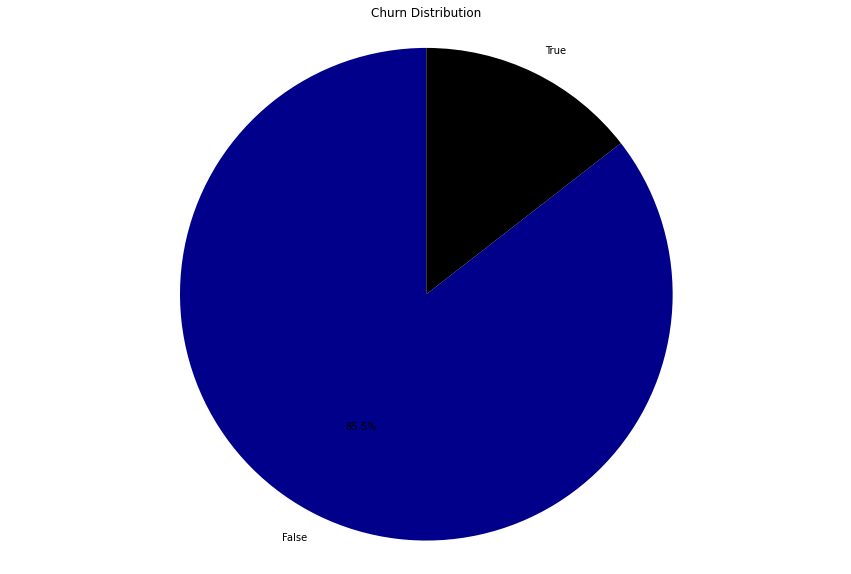

In [31]:

# representing the same using a Pie Chart to visualize the percentages
churn_counts = df['churn'].value_counts()

# Define custom colors
colors = ['darkblue', 'black']

# Create a new figure with a larger size
plt.figure(figsize=(15, 10))

# Create a pie chart with the specified colors
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors)

plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


483 of the 3,333 clients in the dataset have canceled their service with the telecom company. That represents a 14.5% loss of clients.

There is an imbalance in the data in the binary class distribution. Prior to modeling, this must be fixed because an unbalanced feature may lead to inaccurate predictions from the model.


In order to comprehend the distribution of values for various columns, it is essential to further examine the data in order to detect any outliers. I focus primarily on numerical data for this. The performance of machine learning models can be greatly impacted by outliers, which will have an effect on the feature engineering procedure.

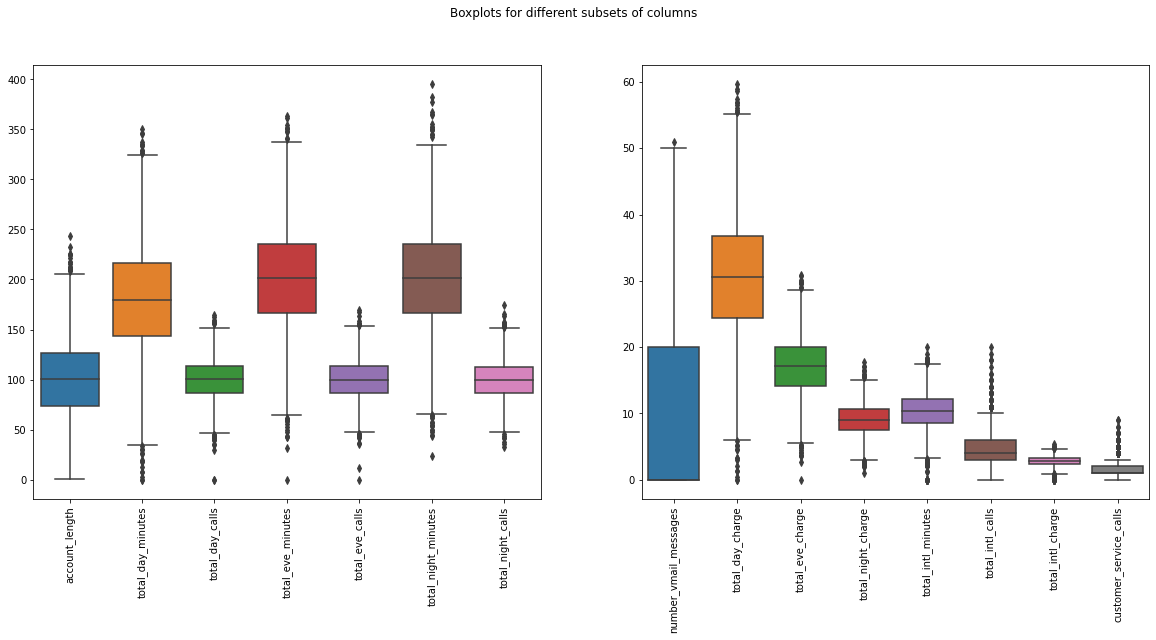

In [32]:
#Checking for outliers in the data
# List of columns for the first boxplot
cols1 = ['account_length','total_day_minutes','total_day_calls',
                'total_eve_minutes','total_eve_calls','total_night_minutes','total_night_calls']

# List of columns for the second boxplot
cols2 = ['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# Create a figure with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create a boxplot for the first subset of columns in the first column
sns.boxplot(data=df[cols1], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Create a boxplot for the second subset of columns in the second column
sns.boxplot(data=df[cols2], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

#setting the figure title
fig.suptitle('Boxplots for different subsets of columns')

# Show the plot
plt.show()

I used two separate boxplots because of the significant difference in scale between the columns. In box boxplots, I can see that the columns have numerous outliers, which may affect the performance of machine learning models such as k-nearest neighbors (knn).

As for our data, all these outliers contain valuable information, which will be very important to our models.




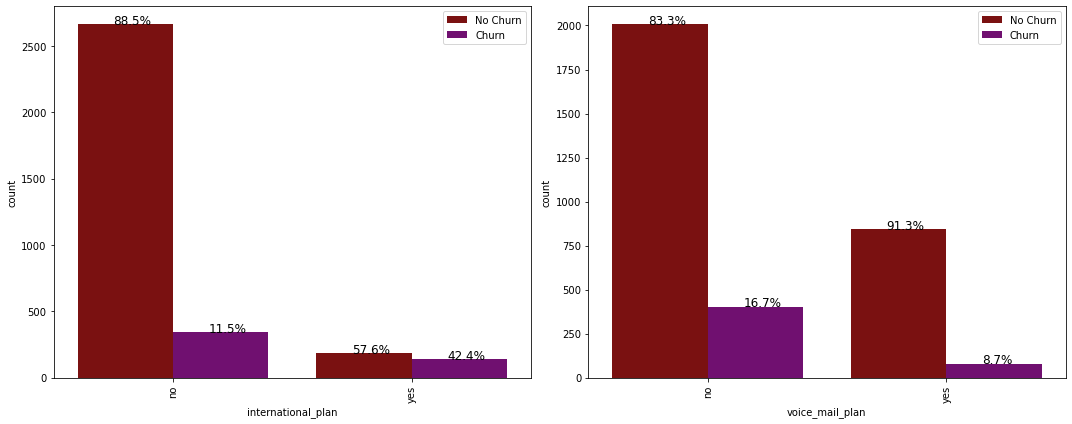

In [33]:

categoric_cols = ['international_plan', 'voice_mail_plan']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categoric_cols), figsize=(15, 6))

# Define custom colors: dark red and purple
custom_palette = ['darkred', 'purple']

for i, col in enumerate(categoric_cols):
    ax = sns.countplot(
        x=col, hue="churn", data=df, 
        order=df[col].value_counts().iloc[0:15].index, 
        ax=axes[i], 
        palette=custom_palette  # Set custom colors
    )
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles, ['No Churn', 'Churn'], loc="upper right")

    # Calculate the total number of observations within each group
    totals = df.groupby(col)["churn"].count().values

    # Iterate over the rectangles in the plot
    for j, p in enumerate(ax.patches):
        # Calculate the percentage of observations in each group
        percentage = '{:.1f}%'.format(100 * p.get_height() / totals[j % 2])
        # Add text annotations with the calculated percentages
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()


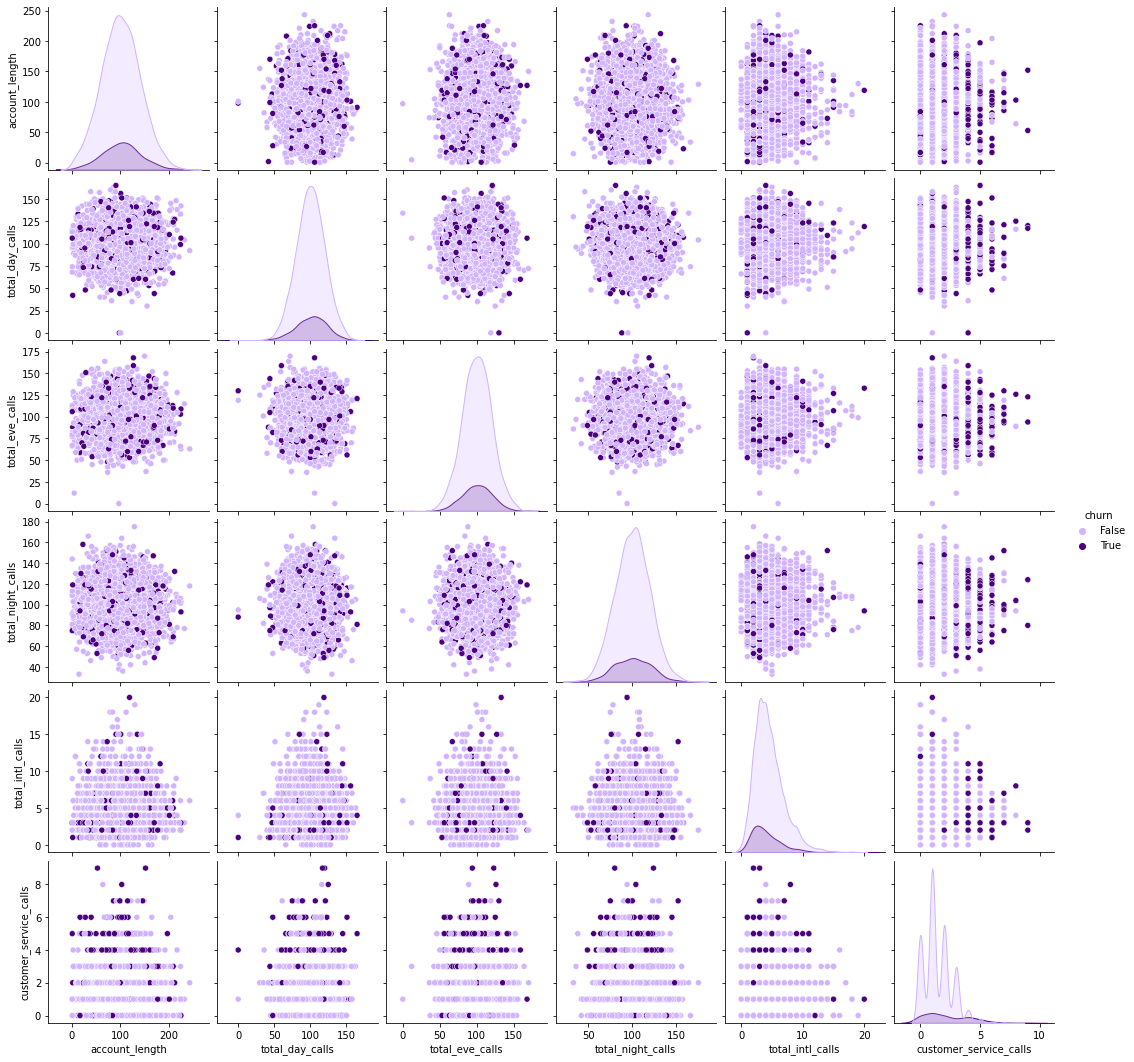

In [34]:
#plotting pairplots for numeric variables
# Extract relevant data
data_temp = df[["account_length", "total_day_calls", "total_eve_calls", 
                "total_night_calls", "total_intl_calls", 
                "customer_service_calls", "churn"]]

# Define a custom color palette: dark purple for 'Churn' and a light color for 'No Churn'
custom_palette = ['#d1b3ff', '#4b0082'] 

# Plot the pairplot with the custom palette
sns.pairplot(data_temp, hue="churn", palette=custom_palette, height=2.5)

# Display the plot
plt.show()



I used a correlation matrix to identify the correlation between different variables in the dataset.

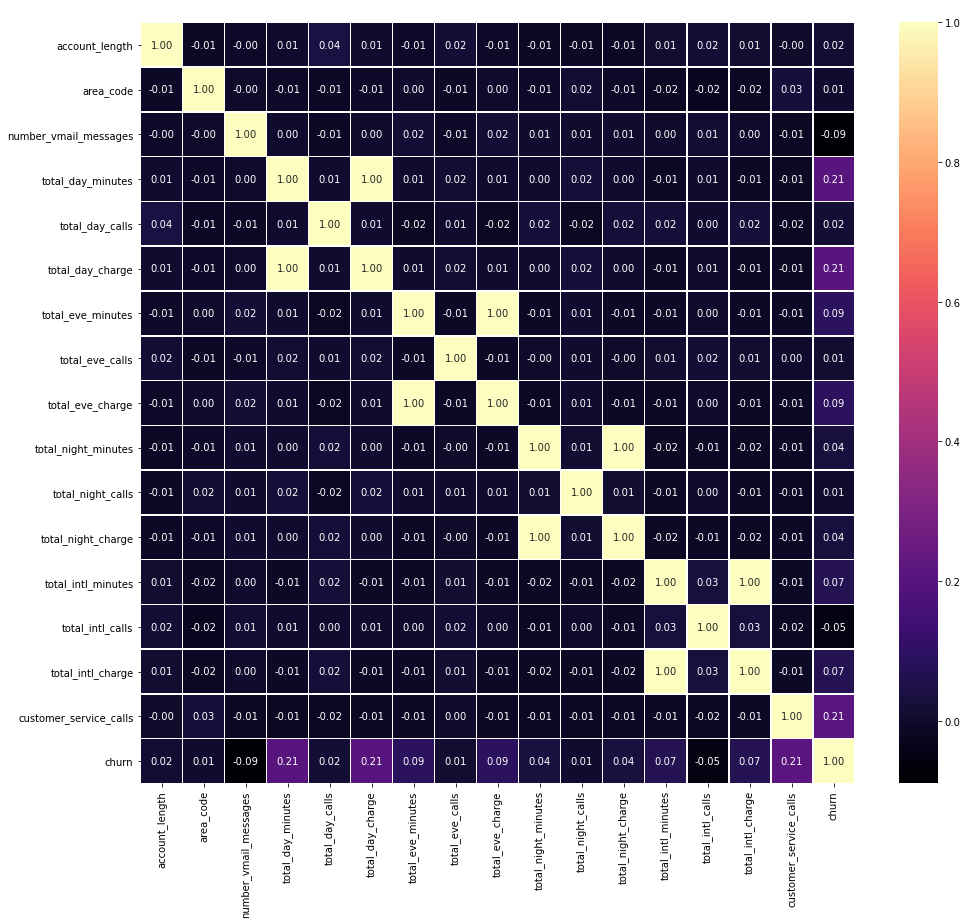

In [35]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate the correlation heatmap with a dark colormap
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='magma',    
    fmt=".2f", 
    linewidths=0.5
)
plt.title('Correlation Matrix between Variables', color='white')
plt.show()


## Basic Data Preprocessing

To get the data ready for modeling, that we preprocess it in this stage. Some of the dataset's numeric and categorical data columns need to be converted into a datatype that the various machine learning models that were employed in the modeling portion can use.

Using one-hot encoding to convert object datatypes in categorical columns to numerical ones—particularly 1s and 0s—is a nice example.

Additionally, the dataset needs to be divided into training and testing sets. The training set will be used to train the various models, and the test data will be used to assess performance. It makes advantage of cross-validation.

Using ridge or lasso regression, also exclude features that have little to no impact on the target variables. I might potentially find more

In [36]:
#convert churn values to integer 1s and 0s
df['churn'] = df['churn'].astype(int)

#convert area_code, international plan, and voice_mail_plan to integers 1s and 0s
df = pd.get_dummies(df, columns=['area_code', 'international_plan', 'voice_mail_plan'])

In [37]:
#displace the first 10 records
df.head(7)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,customer_service_calls,churn,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
phone_number,,,,,,,,,,,,,,,,,,,,,
3824657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,2.70,1,0,0,1,0,1,0,0,1
3717191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,3.70,1,0,0,1,0,1,0,0,1
3581921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,3.29,0,0,0,1,0,1,0,1,0
3759999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,1.78,2,0,1,0,0,0,1,1,0
3306626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,2.73,3,0,0,1,0,0,1,1,0
3918027,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,1.70,0,0,0,0,1,0,1,1,0
3559993,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,2.03,3,0,0,0,1,1,0,0,1


In [38]:
# Separating features from the target variable
y = df['churn']
X = df.drop('churn', axis=1)

In [39]:
#split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: Logistic Regression Model

My first model is Logistic Regression Model. Logistic regression is a type of generalized linear model that can be used to predict the probability of a binary outcome, such as whether a customer will churn or not.

In my case, i will use logistic regression to model the relationship between the our features and the likelihood of a customer churning.

In [40]:
# Create a pipeline for preprocessing (only standardization, as there are no categorical columns)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)  # Apply standardization to all numerical columns
    ]
)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Create a pipeline that includes preprocessing and the logistic regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_model)
])

# Fit the model on the training data
model_pipeline.fit(X_train, y_train)

# Predict churn for the train and test data
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Calculate the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the train and test scores
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix for test data
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.86
Test Accuracy: 0.86
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

Confusion Matrix (Test Data):
[[554  12]
 [ 83  18]]


Comments and notes on model Accuracy: The accuracy of the model is 86% Train Accuracy: 0.86 Test Accuracy: 0.86

Classification Report:

Precision: The precision for class 0 (not churned) is 87%. The precision for class 1 (churned) is 60%
Recall: The recall for class 0 (not churned) is 98% but the recall for class 1 (churned) is only 18%.
F1-score: The F1-score for class 0 (not churned) is 92% and for class 1 (churned) is only 27%. The F1-score for class 1 is low due to the low recall.
We further plot the ROC Curve (Receiver Operating Characteristic curve), the AUC (Area Under the Curve), and Confusion matrix to visualize the results

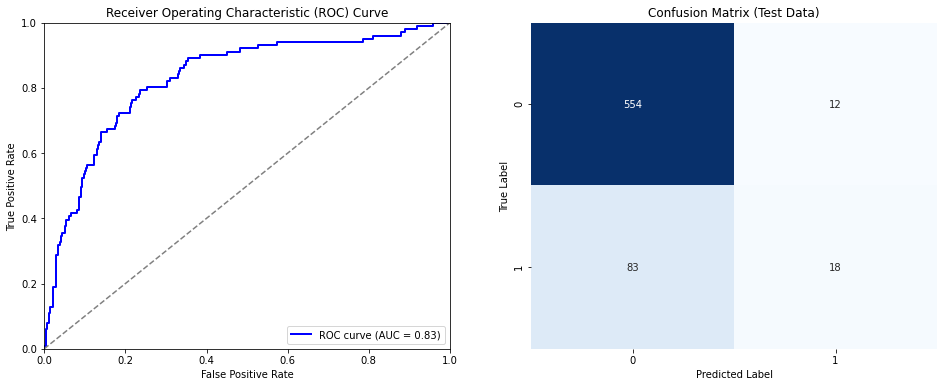

In [41]:
# Plot the ROC curve for test data
y_prob = model_pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class (churned)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot the confusion matrix as a heatmap for test data
confusion_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues', cbar=False, ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')
ax2.set_title('Confusion Matrix (Test Data)')

plt.show()

The model performs well in predicting the negative class (not churned) as evidenced by high accuracy, precision, and recall for class 0.
However, it performs poorly for the positive class (churned) as indicated by the low values for precision, recall, and F1-score for class 1.

### MODEL 1.2 LOGISTIC MODEL ADDRESSING CLASS IMBALANCE

In [42]:
# Create a pipeline for preprocessing (only standardization, as there are no categorical columns)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)  # Apply standardization to all numerical columns
    ]
)

# Initialize the logistic regression model with class_weight parameter
logistic_reg_model2 = LogisticRegression(class_weight='balanced')

# Create a pipeline that includes preprocessing and the logistic regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logistic_reg_model2)
])

# Fit the model on the training data
model_pipeline.fit(X_train, y_train)

# Predict churn for the test data
y_pred = model_pipeline.predict(X_test)

# Calculate the accuracy of the model on train and test data
train_accuracy = model_pipeline.score(X_train, y_train)
test_accuracy = model_pipeline.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Train Accuracy: 0.77
Test Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       566
           1       0.39      0.77      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667

Confusion Matrix:
[[442 124]
 [ 23  78]]


REBALANCED LOGISTIC MODEL INTEPRETATIONS Train Accuracy: 0.77 compared to previous model 0.86 Test Accuracy: 0.78 compared to the previous 0.86 Classification Report: precision class 0 0.95 compared to previous 0.87 precision class 1 0.39 compared to 0.60 recall class 0 0.78 compared to 0.98 recall class 1 0.77 compared to 0.18 f1score class 0 0.86 compared to 0.92 f1score class 1 0.51 compared to 0.27

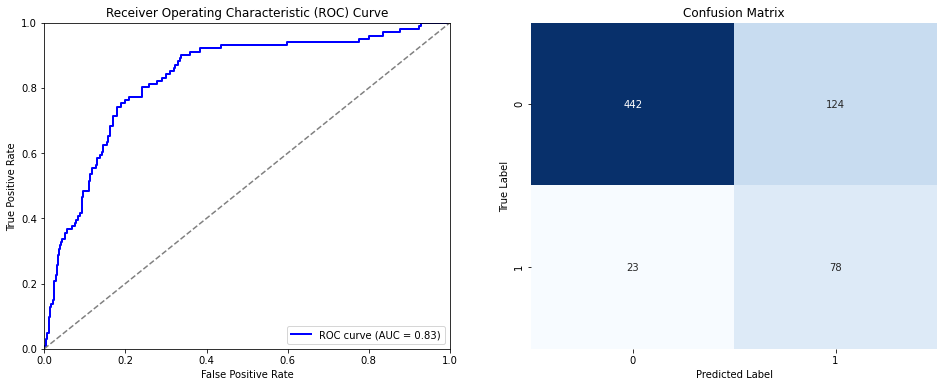

In [43]:
# Plot the ROC curve
y_prob = model_pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class (churned)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot the confusion matrix as a heatmap
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues', cbar=False, ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')
ax2.set_title('Confusion Matrix')

plt.show()

In summary, the model seems to perform well in predicting non-churned customers (class 0) with high precision and recall. However, its performance on predicting minority class (churned customers) (class 1) is not as good, with relatively lower precision and recall.

There is a slight improvement on the previous model in predicting the churned customers comparing to guess work but the model is still not great

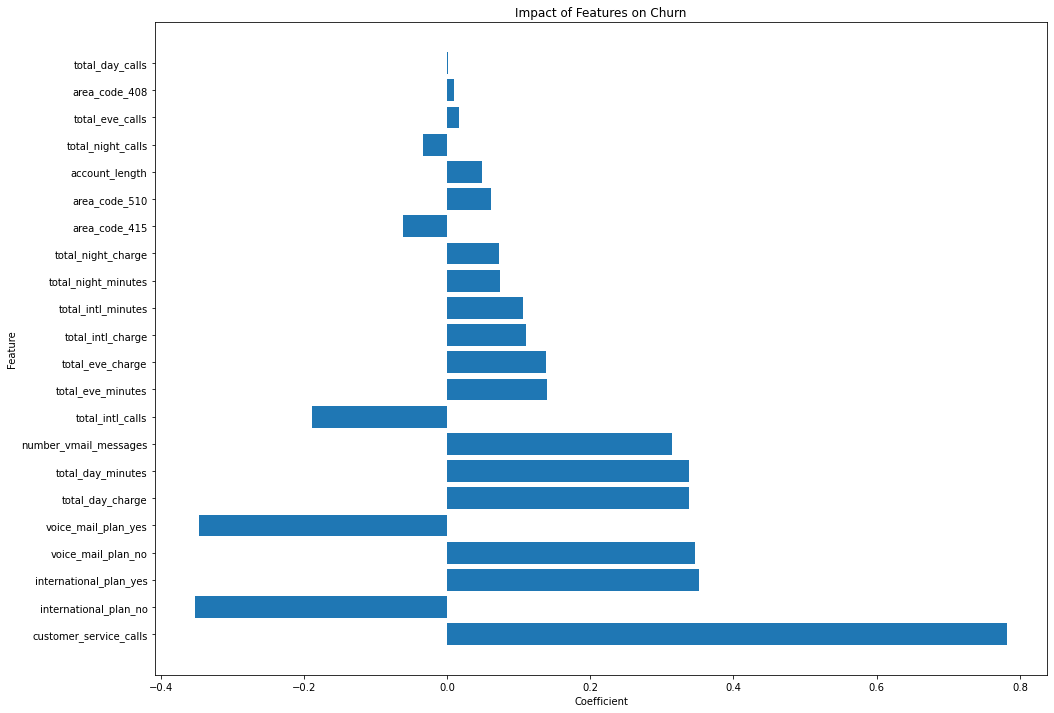

In [44]:
# Get the coefficients of the logistic regression model2
coefficients = model_pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame to display the coefficients along with the corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to see the most impactful features
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(16, 12))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Impact of Features on Churn')
plt.show()

In [45]:
#see the actual coefficient arranged in descending ordger
coefficients_df

,Feature,Coefficient,Abs_Coefficient
14,customer_service_calls,0.781643,0.781643
18,international_plan_no,-0.351737,0.351737
19,international_plan_yes,0.351737,0.351737
20,voice_mail_plan_no,0.346152,0.346152
21,voice_mail_plan_yes,-0.346152,0.346152
4,total_day_charge,0.337942,0.337942
2,total_day_minutes,0.337680,0.337680
1,number_vmail_messages,0.314547,0.314547
12,total_intl_calls,-0.187955,0.187955
5,total_eve_minutes,0.139153,0.139153


Model 2: K-Nearest Neighbors

Baseline Model: Here we build the first K-Nearest Neighbors model with default parameters

In [46]:
#instantiate the standard scaler
scaler = StandardScaler()

#fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5,  weights='uniform')

# Train the classifier on the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

#Calculate train and test scores
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

print(train_score)
print(test_score)

Accuracy: 0.8740629685157422
Precision: 0.7741935483870968
Recall: 0.2376237623762376
F1-score: 0.3636363636363636
0.9103525881470368
0.8740629685157422


87.4% of the test data is accurately classified by our KNN model, which has an accuracy of 0.874 on the test set. My model's precision is 0.774, meaning that it is 77.4% accurate when it forecasts that a consumer will leave. My model's recall is 0.238, meaning that 23.8% of all consumers who churned are accurately identified by our model. The harmonic mean of precision and recall, or F1-score, is 0.364.

The degree to which our model matches the data is indicated by both the train and test scores. With a train score of 0.910, 91% of the training data is properly classified by our model. With a test score of 0.874, we are marginally

#### Grid search and hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search through
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to consider
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'p': [1, 2]                         # Power parameter for Minkowski distance
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found by GridSearch
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Create a new KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                p=best_params['p'])

# Train the best KNN classifier on the training data
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data using the best KNN classifier
y_pred_best = best_knn.predict(X_test_scaled)

# Evaluate the best KNN model's performance
accuracy_best_knn = accuracy_score(y_test, y_pred_best)
precision_best_knn = precision_score(y_test, y_pred_best)
recall_best_knn = recall_score(y_test, y_pred_best)
f1_best_knn = f1_score(y_test, y_pred_best)

# Print the evaluation metrics of the best KNN model
print("\nBest KNN Model Performance:")
print("Accuracy:", accuracy_best_knn)
print("Precision:", precision_best_knn)
print("Recall:", recall_best_knn)
print("F1-score:", f1_best_knn)

#Calculate train and test scores
best_knn_train_score = best_knn.score(X_train_scaled, y_train)
best_knn_test_score = best_knn.score(X_test_scaled, y_test)

print(best_knn_train_score)
print(best_knn_test_score)

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

Best KNN Model Performance:
Accuracy: 0.8845577211394303
Precision: 0.8
Recall: 0.31683168316831684
F1-score: 0.45390070921985815
1.0
0.8845577211394303


#### Ensemble Methods.

To improve the KNN models, I combined multiple KNN models by using the ensemble technique Bagging to create a more robust and accurate classifier.

In [48]:
# Building an ensemble KNN model using Bagging
from sklearn.ensemble import BaggingClassifier

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Instantiate the BaggingClassifier with KNN as the base estimator
bagging_knn = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)

# Train the ensemble model on the training data
bagging_knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_bagging = bagging_knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_bagging_knn = accuracy_score(y_test, y_pred_bagging)
precision_bagging_knn = precision_score(y_test, y_pred_bagging)
recall_bagging_knn = recall_score(y_test, y_pred_bagging)
f1_bagging_knn = f1_score(y_test, y_pred_bagging)

# Print the evaluation metrics
print("Accuracy:", accuracy_bagging_knn)
print("Precision:", precision_bagging_knn)
print("Recall:", recall_bagging_knn)
print("F1-score:", f1_bagging_knn)

#Calculate train and test scores
bagging_knn_train_score = bagging_knn.score(X_train_scaled, y_train)
bagging_knn_test_score = bagging_knn.score(X_test_scaled, y_test)

print(bagging_knn_train_score)
print(bagging_knn_test_score)

Accuracy: 0.8800599700149925
Precision: 0.8
Recall: 0.27722772277227725
F1-score: 0.411764705882353
0.9122280570142536
0.8800599700149925


KNN model 2: Bagging Classifier ensemble model is the best performing model of the three KNN models because it does not overfit and it has a higher Accuracy, Precision and F1-score

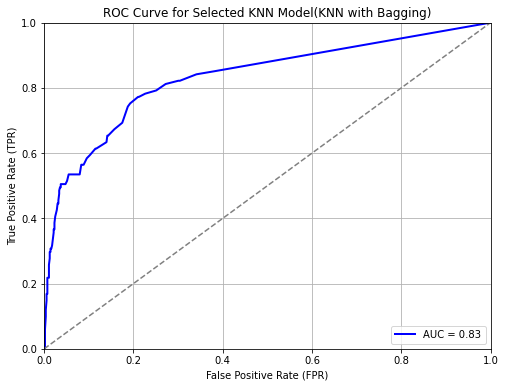

In [49]:
# Get probability estimates for the positive class (class 1)
y_prob = bagging_knn.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Selected KNN Model(KNN with Bagging)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

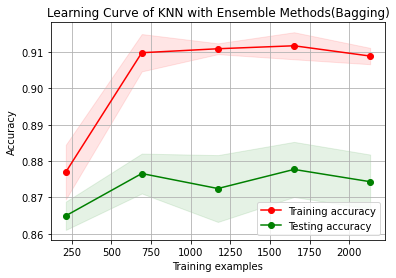

In [50]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing accuracy")
    plt.legend(loc="best")
    plt.show()

# Assuming you have already defined X_train_scaled and y_train
# best_model is the best KNN model from the grid search
plot_learning_curve(bagging_knn, "Learning Curve of KNN with Ensemble Methods(Bagging)", X_train_scaled, y_train, cv=5)

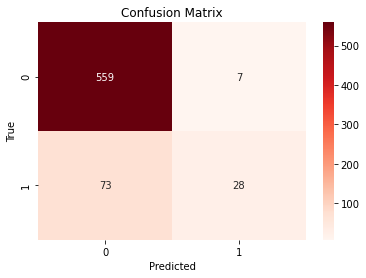

In [51]:
# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred_bagging)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_bagging))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       566
           1       0.80      0.28      0.41       101

    accuracy                           0.88       667
   macro avg       0.84      0.63      0.67       667
weighted avg       0.87      0.88      0.85       667



Intepreting results for the Bagging KNN model:

Accuracy: The overall accuracy of the model on the test dataset is 0.88, meaning that it correctly predicted 88% of all instances.

Precision: For class 0, the model achieved a precision of 0.88, which means that the model accurately predicted class 0 88% of the time. For class 1, the precision is 0.80, indicating that 80% of the instances predicted as class 1 were correctly predicted.

Recall: For class 0, the model achieved a recall of 0.99, which means it correctly identified 99% of the instances belonging to class 0. For class 1, the recall is 0.28, indicating that the model correctly identified only 28% of the instances belonging to class 1 out of all actual class 1 instances

F1-score: For class 0, the F1-score is 0.93, and for class 1, it is 0.41. The weighted average of the F1-scores is 0.85, indicating the overall performance of the model.

Training and Testing Accuracy: The model has a higher accuracy on the training set (91.22%) compared to the testing set (88%). This scores show that the model is performing fairly well in predicting both the train and test scores

### Model 3:  RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the standard scaler
scaler = StandardScaler()

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

# Calculate train and test scores
train_score = rf.score(X_train_scaled, y_train)
test_score = rf.score(X_test_scaled, y_test)

print("Train score:", train_score)
print("Test score:", test_score)

Accuracy: 0.9445277361319341
Precision: 0.9210526315789473
Recall: 0.693069306930693
F1-score: 0.7909604519774012
Train score: 1.0
Test score: 0.9445277361319341


In conclusion, the Random Forest model seems to have performed well in predicting churn and not churned customers based on yesterday's data. It achieved high accuracy, precision, and recall scores, indicating that it is effective in identifying churned customers while minimizing false positives.

In [54]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Instantiate the Random Forest classifier with desired parameters
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Address overfitting by using k-fold cross-validation
k = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=k, scoring='accuracy')

# Train the classifier on the entire training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_rf = np.mean(cv_scores)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Cross-Validation Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

# Calculate train and test scores
train_score = rf.score(X_train_scaled, y_train)
test_score = rf.score(X_test_scaled, y_test)

# Print the train and test scores
print("Train score:", train_score)
print("Test score:", test_score)

Cross-Validation Accuracy: 0.9523655936645797
Precision: 0.9210526315789473
Recall: 0.693069306930693
F1-score: 0.7909604519774012
Train score: 1.0
Test score: 0.9445277361319341


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the Random Forest classifier with reduced n_estimators and limited max_depth
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Address overfitting by using k-fold cross-validation
k = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=k, scoring='accuracy')

# Train the classifier on the entire training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_rf = np.mean(cv_scores)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Cross-Validation Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

# Calculate train and test scores
train_score = rf.score(X_train_scaled, y_train)
test_score = rf.score(X_test_scaled, y_test)

# Print the train and test scores
print("Train score:", train_score)
print("Test score:", test_score)

Cross-Validation Accuracy: 0.943736605041072
Precision: 0.958904109589041
Recall: 0.693069306930693
F1-score: 0.8045977011494252
Train score: 0.977119279819955
Test score: 0.9490254872563718


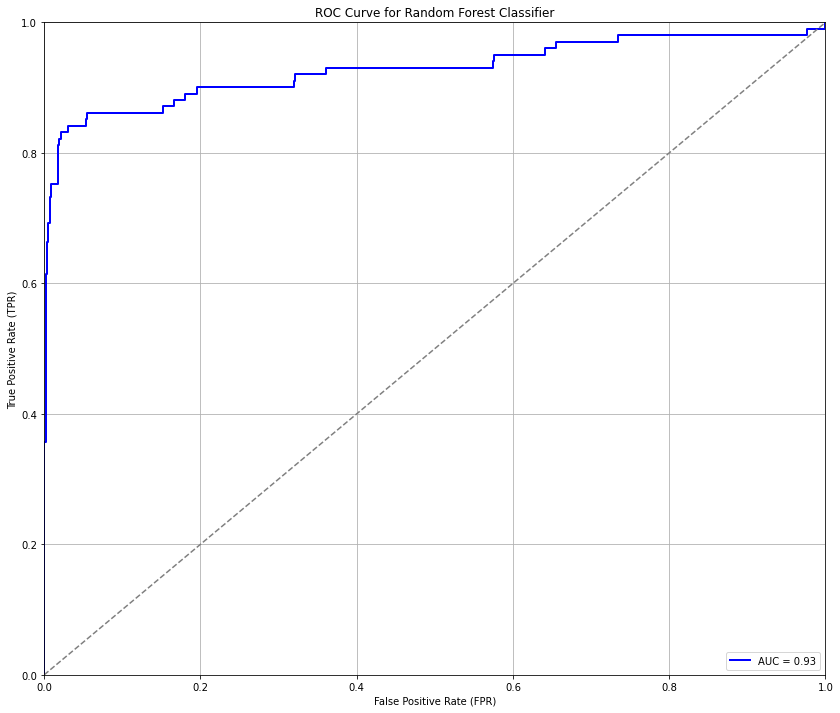

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability estimates for class 1 (positive class)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(14, 12))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In summary, the Random Forest model seems to perform well overall in predicting customer churn based on the given dataset. It has high accuracy and precision, indicating it correctly classifies a significant portion of churned and not churned customers. However, the recall could be improved to better capture churned customers.

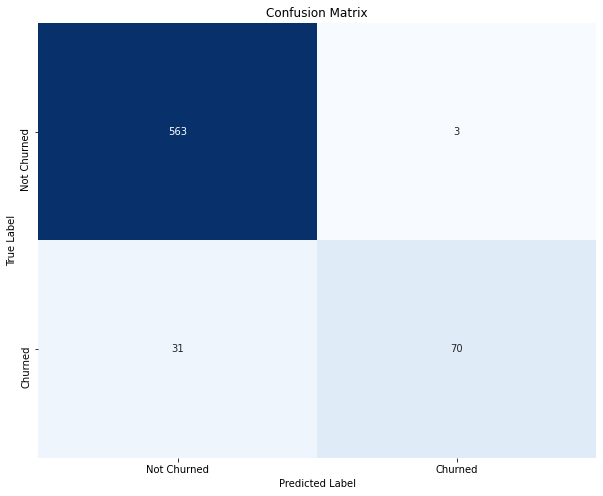

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

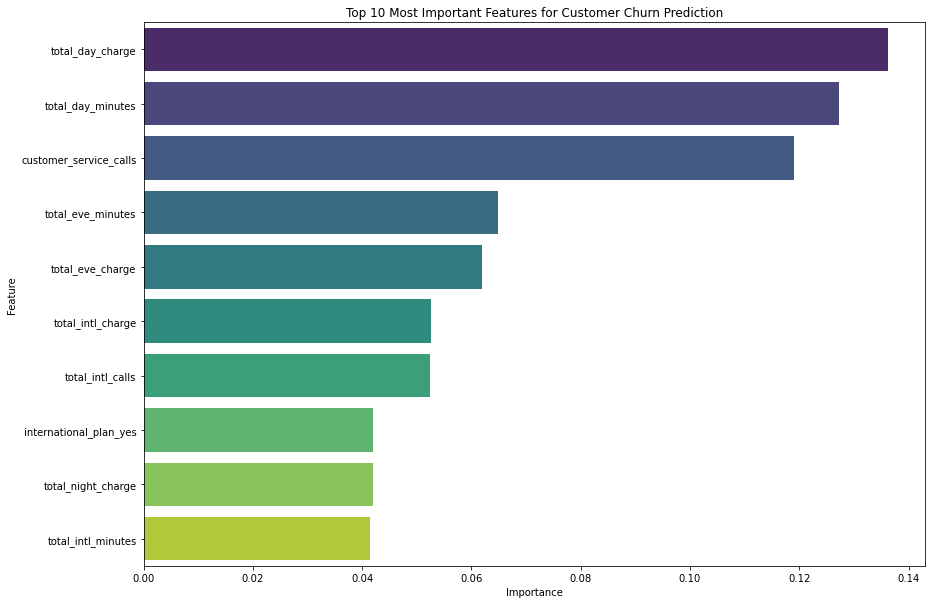

In [58]:

from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest classifier with desired parameters
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data (using scaled features)
rf.fit(X_train_scaled, y_train)

# Get the feature importances from the trained model
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances and corresponding feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_n = 10  # You can change this value to get more or fewer features
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Most Important Features for Customer Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [59]:
importance_df

,Feature,Importance
4,total_day_charge,0.136149
2,total_day_minutes,0.127265
14,customer_service_calls,0.119014
5,total_eve_minutes,0.064852
7,total_eve_charge,0.062002
13,total_intl_charge,0.052610
12,total_intl_calls,0.052502
19,international_plan_yes,0.042068
10,total_night_charge,0.041968
11,total_intl_minutes,0.041368


COMPARISON TO CHOOSE THE BEST MODEL

In [60]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression',
                                          'K-Nearest Neighbors Classifier',
                                          'Random Forest Classifier'],
                                 'Accuracy (Test Set)':[0.78,0.88,0.94],
                                 'F1 Score (Test Set)':[0.51,0.41,0.80],
                                 'Recall (Test Set)':[0.77,0.28,0.69],
                                 'Precision (Test Set)':[0.39,0.80,0.96]})

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

,Model,Accuracy (Test Set),F1 Score (Test Set),Recall (Test Set),Precision (Test Set)
0,Logistic Regression,0.780000,0.510000,0.770000,0.390000
1,K-Nearest Neighbors Classifier,0.880000,0.410000,0.280000,0.800000
2,Random Forest Classifier,0.940000,0.800000,0.690000,0.960000


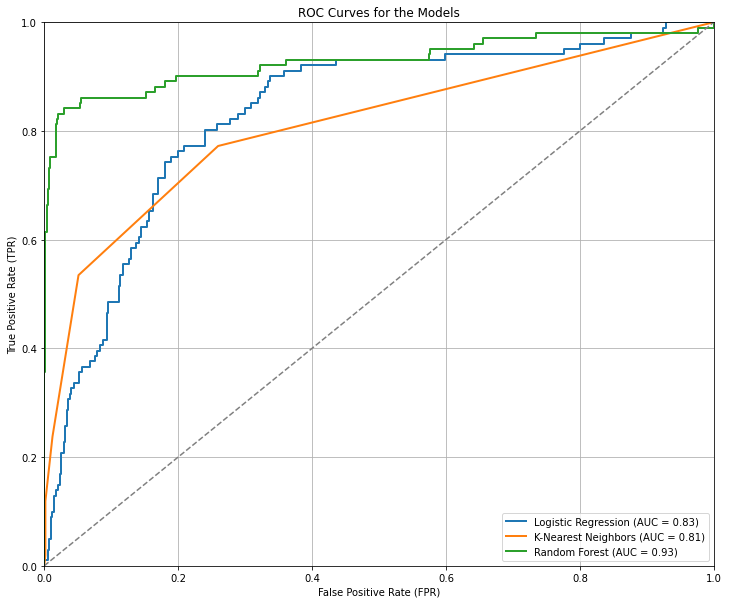

In [61]:

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifiers
lg = LogisticRegression(class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

classifiers = [lg, knn, rf]
names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest']

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(12, 10))

# Loop through each classifier and plot its ROC curve
for clf, name in zip(classifiers, names):
    clf.fit(X_train_scaled, y_train)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for the Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The ROC curves for Logistic Regression, K-Nearest Neighbors and Random Forest models were analyzed. The Random Forest model outperformed the others, showing a higher Area Under the Curve (AUC) and better classification performance, making it the most effective model for the given task.

Based on the provided metrics,the logistic regression had the highest recall (73.00%), while the Random Forest Classifier achieved the highest precision (96.00%). The Random Forest Classifier is the best performing model overall and so we selected it as our best model.